In [150]:
import open_clip
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

model, _, transform = open_clip.create_model_and_transforms(
  model_name="coca_ViT-L-14",
  pretrained="mscoco_finetuned_laion2B-s13B-b90k"
)

In [151]:
def crop_object_with_mask(image):
   """Crops an image to the minimal bounding box containing the mask.
   """
   img = Image.fromarray(image)

   # Load the image
   img_array = np.array(image)
   # print(img_array[2])

   # Find non-white pixels
   mask_loc = np.any(img_array < 190, axis=2)  # Check all color channels

   # Find bounding box coordinates
   ymin, xmin = np.where(mask_loc)[0].min(), np.where(mask_loc)[1].min()
   ymax, xmax = np.where(mask_loc)[0].max() + 1, np.where(mask_loc)[1].max() + 1

   # Crop the image
   cropped_img = img.crop((xmin, ymin, xmax, ymax))

   return cropped_img

In [152]:
from PIL import Image
file_path = "/home/rcli/sam-ws/segment-anything/brl_notebooks/isolating_masks/Attempt_2/strawberry1"
files = os.listdir(file_path)
files.sort(key=lambda x:int(x[:-4]))

In [153]:
full_img_path = "/home/rcli/sam-ws/segment-anything/brl_notebooks/images/strawberry1.png"
img = Image.open(full_img_path).convert("RGB")
img = transform(img).unsqueeze(0)

with torch.no_grad(), torch.cuda.amp.autocast():
  generated = model.generate(img)

print(open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", ""))

a close up of a bunch of strawberries on a plant . 


/home/rcli/sam-ws/segment-anything/brl_notebooks/isolating_masks/Attempt_2/strawberry1/1.png
a close up of some strawberries growing on a plant . 
/home/rcli/sam-ws/segment-anything/brl_notebooks/isolating_masks/Attempt_2/strawberry1/2.png
a close - up view of a green plant . 
/home/rcli/sam-ws/segment-anything/brl_notebooks/isolating_masks/Attempt_2/strawberry1/3.png
an image of a beach with a person on the beach . 
/home/rcli/sam-ws/segment-anything/brl_notebooks/isolating_masks/Attempt_2/strawberry1/4.png
a close - up of a white ball with a green plant in it . 
/home/rcli/sam-ws/segment-anything/brl_notebooks/isolating_masks/Attempt_2/strawberry1/5.png
a close - up of a strawberry cut in half . 
/home/rcli/sam-ws/segment-anything/brl_notebooks/isolating_masks/Attempt_2/strawberry1/6.png
a close - up of a yellow strawberry with green leaves on it . 
/home/rcli/sam-ws/segment-anything/brl_notebooks/isolating_masks/Attempt_2/strawberry1/7.png
a close - up picture of a plant with green 

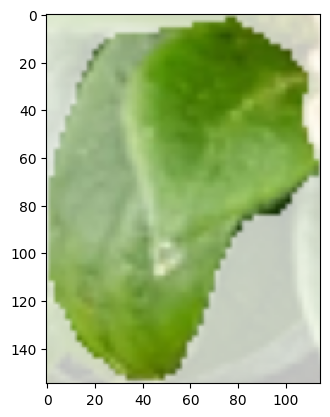

In [154]:
for file in files:
  image_path = os.path.join(file_path, file)
  print(image_path)
  image = cv.imread(image_path)
  # image = image[200:, :]
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  croped_image = crop_object_with_mask(image)
  im = croped_image.convert("RGB")
  plt.imshow(im)

  # im = Image.open(image_path).convert("RGB")
  # im = crop_object_with_mask(im)

  im = transform(im).unsqueeze(0)

  with torch.no_grad(), torch.cuda.amp.autocast():
    generated = model.generate(im)

  print(open_clip.decode(generated[0]).split("<end_of_text>")[0].replace("<start_of_text>", ""))
  